<h1 align="center">Comparative Analysis</h1>

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [42]:
df_WMT = pd.read_csv('C:\Rutgers\BA\Walmart Stock Price from 1972-2022\WMT.csv')
df_WMT['Date'] = pd.to_datetime(df_WMT['Date'])
df_WMT['Year'] = df_WMT['Date'].dt.year
df_WMT.head()

<>:1: SyntaxWarning:

invalid escape sequence '\R'

<>:1: SyntaxWarning:

invalid escape sequence '\R'

C:\Users\naimi\AppData\Local\Temp\ipykernel_10768\1855009042.py:1: SyntaxWarning:

invalid escape sequence '\R'



,Date,Open,High,Low,Close,Adj Close,Volume,Year
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.036447,2508800,1972
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.036309,972800,1972
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.035895,1945600,1972
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.035895,409600,1972
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.035343,870400,1972


In [43]:
data_2010 = df_WMT[df_WMT['Year'] == 2010]
data_2017 = df_WMT[df_WMT['Year'] == 2017]
data_2010_2017 = df_WMT[(df_WMT['Year'] >= 2010) & (df_WMT['Year'] <= 2017)]


- **X-Axis (Date)**: Represents the timeline from the start of 2010 to the end of 2017.
- **Y-Axis (Volume)**: Displays the trading volume, representing the number of shares traded on each day.

### Key Observations:
1. **Overall Trend**: Trading volume fluctuates consistently across the years, with no strong upward or downward trends over time.
2. **Spikes in Volume**:
   - Noticeable peaks occur at certain points, particularly in 2016 and 2017. These could be associated with significant corporate announcements, earnings releases, or macroeconomic events.
3. **Declining Activity**: From 2010 to 2012, there seems to be a slight downward trend in trading volume, indicating reduced trading activity during this period.

This graph highlights how trading activity has evolved over time and provides insights into periods of high or unusual activity.

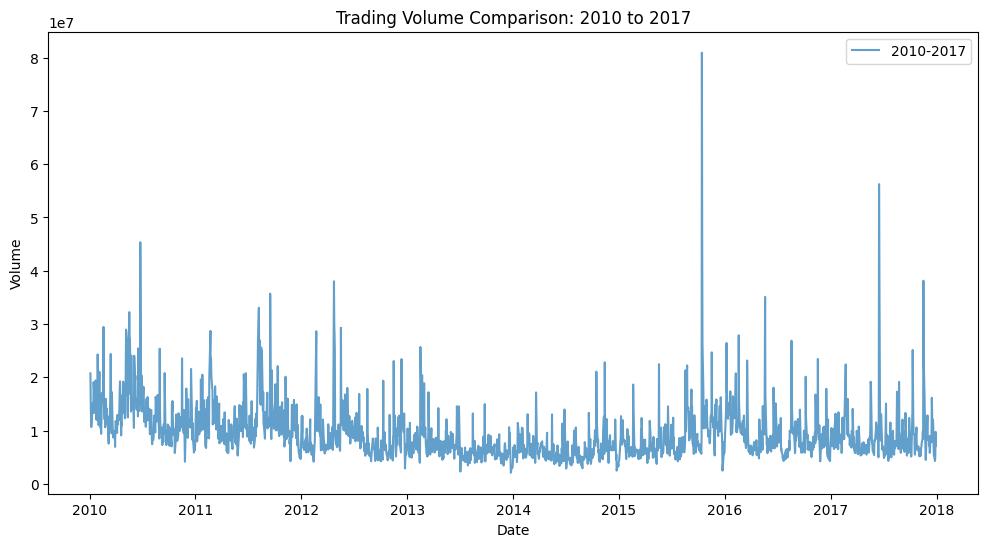

In [44]:
plt.figure(figsize=(12, 6))
plt.plot(data_2010_2017['Date'], data_2010_2017['Volume'], label='2010-2017', alpha=0.7)
plt.title('Trading Volume Comparison: 2010 to 2017')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

- **X-Axis (Price Type)**: Represents the four price categories: Open, High, Low, and Close.
- **Y-Axis (Price)**: Displays the price levels in USD.
- **Boxplots**: Each boxplot summarizes the distribution of prices for a specific year and price type.

### Key Observations:
1. **Rising Trends**:
   - Over the years, the price ranges (Open, High, Low, Close) generally shift upwards, indicating an overall increase in stock price levels.
   - For example, 2017 shows consistently higher prices compared to earlier years like 2011 and 2012.

2. **Yearly Variability**:
   - The interquartile range (IQR), represented by the height of each box, indicates variability. Some years, such as 2014 and 2015, exhibit greater variability in prices compared to others.

3. **Outliers**:
   - Outliers, marked as individual points, are visible in all price categories, particularly in the High and Close prices. These indicate days with unusually high or low prices.

4. **Consistency in Open and Low Prices**:
   - Open and Low prices tend to exhibit smaller ranges and less variability compared to High and Close prices.

This boxplot helps visualize the yearly trends and variability in Walmart stock prices, highlighting the gradual increase in prices over the years and the presence of occasional outliers.

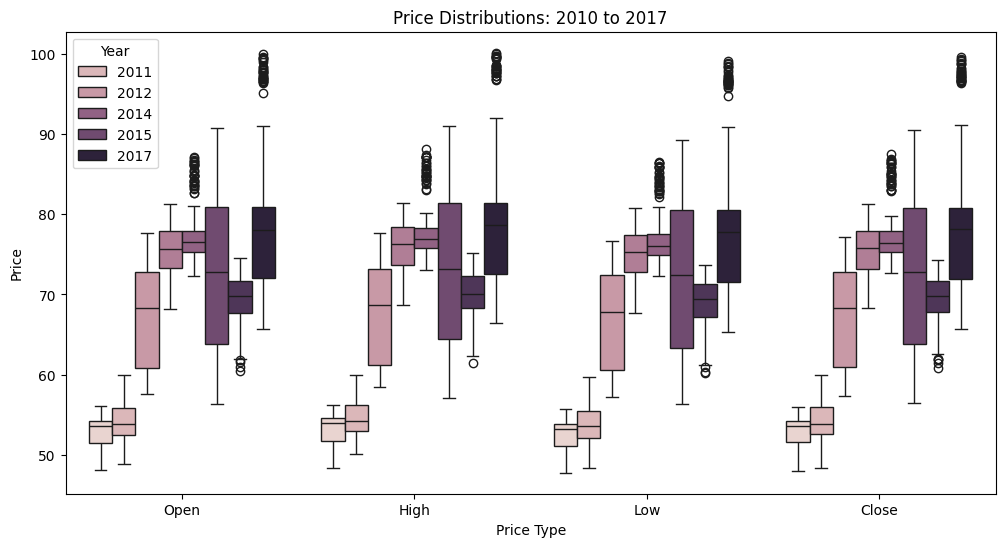

In [45]:
price_cols = ['Open', 'High', 'Low', 'Close']
price_data = data_2010_2017.melt(id_vars=['Year'], value_vars=price_cols, 
                                 var_name='Price Type', value_name='Price')

# Create the boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=price_data, x='Price Type', y='Price', hue='Year')
plt.title('Price Distributions: 2010 to 2017')
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.show()

- **X-Axis (Date)**: Represents the timeline from 2010 to 2017.
- **Y-Axis (Price)**: Shows the 50-day moving average of the stock's closing prices, measured in USD.
- **Lines**: Each colored line represents the 50-day moving average for a specific year.

### Key Observations:
1. **Upward Trend**:
   - A gradual increase in the moving average is observed over the years, reflecting a consistent rise in Walmart's stock prices.
   - The average price in 2017 is significantly higher compared to earlier years like 2010 or 2011.

2. **Volatility and Smoothness**:
   - The moving average smooths out daily fluctuations, showing long-term trends.
   - Years like 2012 and 2015 exhibit steeper slopes, indicating periods of rapid price growth.

3. **Data Gaps**:
   - Gaps between the lines correspond to periods where insufficient data is available for calculating the moving average.

C:\Users\naimi\AppData\Local\Temp\ipykernel_10768\1297579008.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



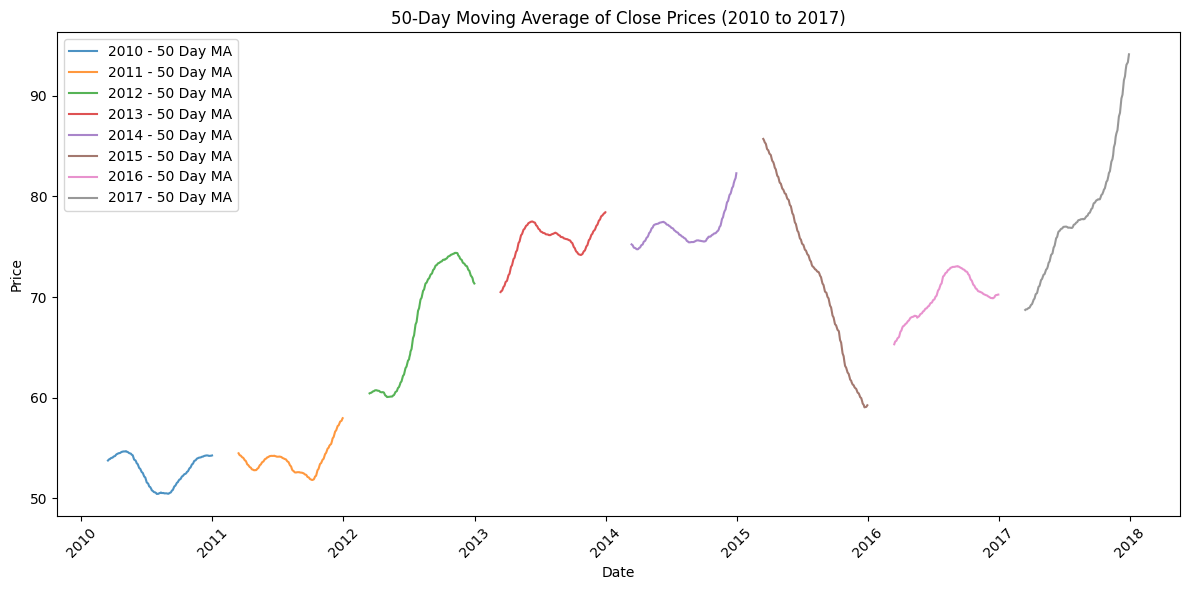

In [46]:
data_2010_2017['50Day_MA'] = data_2010_2017.groupby('Year')['Close'].transform(lambda x: x.rolling(window=50).mean())

plt.figure(figsize=(12, 6))

# Plotting grouped by year
for year, group in data_2010_2017.groupby('Year'):
    plt.plot(group['Date'], group['50Day_MA'], label=f'{year} - 50 Day MA', alpha=0.8)

# Enhancing visualization
plt.title('50-Day Moving Average of Close Prices (2010 to 2017)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

- **Axes**: Both axes represent the price metrics (Open, High, Low, Close).
- **Color Scale**: The color scale indicates the degree of correlation:
  - **Dark Red**: High positive correlation (+1.00).
  - **Dark Blue**: Low or no correlation (closer to 0).

### Key Observations:
1. **High Correlations**:
   - Both years show strong positive correlations between all price metrics, with values close to +1.00.
   - This is expected, as Open, High, Low, and Close prices often move together in a stock market.

2. **Yearly Comparison**:
   - While 2010 shows slightly lower correlations between certain metrics (e.g., Open vs. Close at 0.97), the differences are minimal.
   - In 2017, correlations are near-perfect across all metrics, indicating tighter relationships between price movements.

3. **Interpretation**:
   - Strong correlations suggest that stock price movements during the day are highly dependent on one another, a common characteristic in liquid and stable stocks.

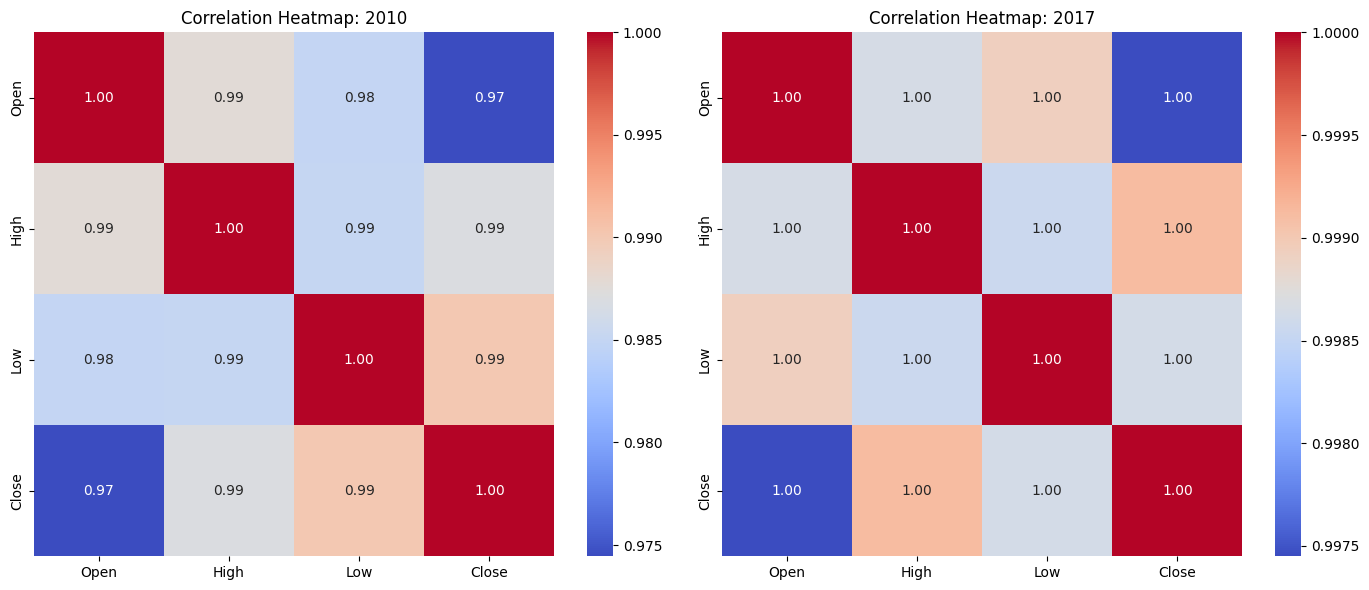

In [47]:

correlation_2010 = data_2010[price_cols].corr()
correlation_2017 = data_2017[price_cols].corr()

# Plot the correlation heatmaps for 2010 and 2017
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.heatmap(correlation_2010, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap: 2010')

plt.subplot(1, 2, 2)
sns.heatmap(correlation_2017, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap: 2017')

plt.tight_layout()
plt.show()


### Open Prices:
- **Trend**: The Open prices show a consistent upward trend from 2010 to 2017, with some periods of stagnation.
- **Significant Growth**: A sharp increase is visible from 2016 onwards.

### High Prices:
- **Volatility**: High prices are more volatile than Open prices, with significant peaks around 2014 and 2016.
- **Growth**: Despite fluctuations, the overall trend is upward.

### Low Prices:
- **Pattern**: The Low prices mimic the overall pattern of the High prices but are consistently lower, as expected.
- **Notable Observations**: Some steep drops are observed in 2014 and 2015.

### Close Prices:
- **Steady Growth**: The Close prices reflect a steady increase over the years, with sharper growth from 2016 onward.
- **Similarity to Open Prices**: Close prices closely follow the trends seen in the Open prices.

## Key Insights:
1. **Overall Growth**: Across all price metrics, there is a consistent upward trend from 2010 to 2017, indicating long-term growth in Walmart's stock price.
2. **Volatility**: The High and Low prices exhibit more volatility, likely reflecting daily trading dynamics.
3. **Market Confidence**: The increasing trends suggest growing investor confidence in Walmart stock over this period.

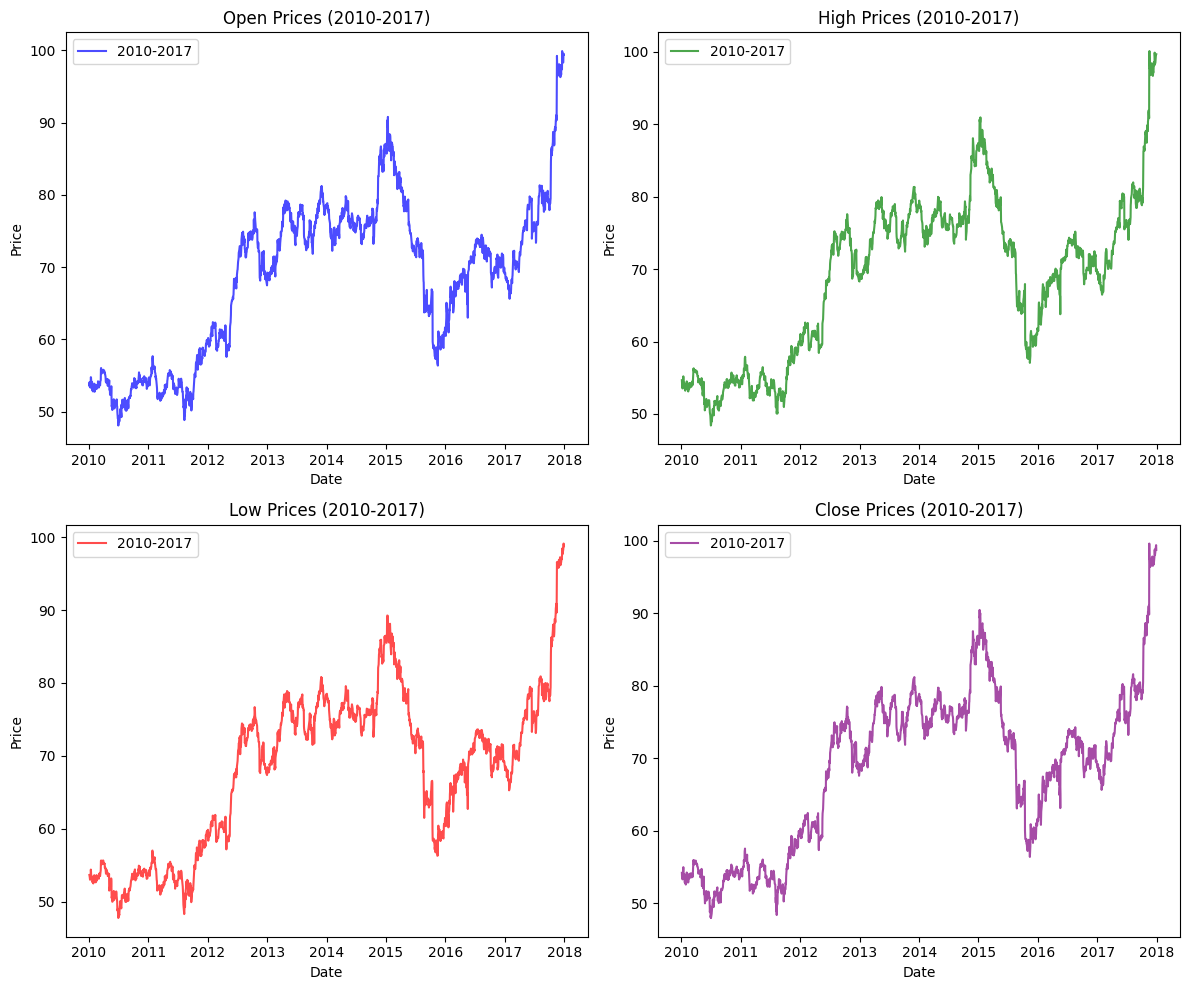

In [48]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Open prices
axs[0, 0].plot(data_2010_2017['Date'], data_2010_2017['Open'], label='2010-2017', alpha=0.7, color='blue')
axs[0, 0].set_title('Open Prices (2010-2017)')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Price')
axs[0, 0].legend()

# High prices
axs[0, 1].plot(data_2010_2017['Date'], data_2010_2017['High'], label='2010-2017', alpha=0.7, color='green')
axs[0, 1].set_title('High Prices (2010-2017)')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Price')
axs[0, 1].legend()

# Low prices
axs[1, 0].plot(data_2010_2017['Date'], data_2010_2017['Low'], label='2010-2017', alpha=0.7, color='red')
axs[1, 0].set_title('Low Prices (2010-2017)')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Price')
axs[1, 0].legend()

# Close prices
axs[1, 1].plot(data_2010_2017['Date'], data_2010_2017['Close'], label='2010-2017', alpha=0.7, color='purple')
axs[1, 1].set_title('Close Prices (2010-2017)')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Price')
axs[1, 1].legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

- **X-Axis (Date)**: Represents the timeline from 2010 to 2017.
- **Y-Axis (Price)**: Displays the stock prices (in USD).
- **Candlesticks**:
  - **Green Candlesticks**: Indicate days where the closing price was higher than the opening price (bullish days).
  - **Red Candlesticks**: Indicate days where the closing price was lower than the opening price (bearish days).

### Key Observations:
1. **Overall Growth**:
   - Stock prices show a general upward trend from 2010 to 2017, with prices nearly doubling during this period.

2. **Volatility**:
   - Some periods, such as 2015, exhibit higher volatility, with more prominent daily price changes.
   - Conversely, earlier years (e.g., 2010–2012) exhibit less volatility.

3. **Bullish and Bearish Periods**:
   - Bullish trends dominate, particularly from 2016 to 2017, with stock prices reaching all-time highs.
   - Short-term bearish trends are observed around mid-2015 and early 2016.

In [49]:
fig = go.Figure()

# Add candlestick data for each year
for year in data_2010_2017['Year'].unique():
    year_data = data_2010_2017[data_2010_2017['Year'] == year]
    fig.add_trace(
        go.Candlestick(
            x=year_data['Date'],
            open=year_data['Open'],
            high=year_data['High'],
            low=year_data['Low'],
            close=year_data['Close'],
            name=str(year),
            increasing_line_color='green',
            decreasing_line_color='red',
        )
    )

# Enhance the chart
fig.update_layout(
    title='Candlestick Chart for 2010 to 2017',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=False,
    legend=dict(title="Year"),
    dragmode='zoom'
)
fig.update_traces(hovertext='')


# Show the chart
fig.show()
